In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [4]:
def LoadData(negFilePath, posFilePath):
    negFileContent = pd.read_csv(negFilePath)
    posFileContent = pd.read_csv(posFilePath)
    df = negFileContent.append(posFileContent)
    df = shuffle(df)
    del negFileContent
    del posFileContent
    return df

In [5]:
def SplitData(df):
    # get features and labels
    featuresColumns = df.columns[0:len(df.columns) - 1]
    lablesColumn = df.columns[len(df.columns) - 1]
    trainingFeaturesX = df.loc[:, featuresColumns]
    trainingLabely = df.loc[:, lablesColumn]
    # split the data into training and test
    traningFeatures, testFeatures, trainingLabels, actualResults = train_test_split(trainingFeaturesX, trainingLabely,test_size=0.33, random_state=42)
    return traningFeatures, testFeatures, trainingLabels, actualResults

In [6]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Process": GaussianProcessClassifier()
}

In [7]:
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 1):

    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        classifier.fit(X_train, Y_train)
        Y_pred = classifier.predict(X_test)
        cm = confusion_matrix(Y_test, Y_pred)        
        
        print classifier_name
        print cm
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix of the classifier')
        fig.colorbar(cax)
        labels= ['break signal', 'no break signal']
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

In [8]:
def classify(X_train, Y_train, X_test, Y_test):

    classifier = SVC(kernel="linear", C=0.025)
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)        
    
    print "Linear SVM"
    print cm
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    labels= ['break signal', 'no break signal']
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Load data of 1 subject (VPae) from 2; positive and negative files, into 1 dataframe

In [9]:
df = LoadData("csv/negVPae.csv", "csv/posVPae.csv")

Removing columns that were not used in the paper (https://www.frontiersin.org/articles/10.3389/fninf.2018.00029/full?fbclid=IwAR3kXD7YAUnxuhdfnd1hHKIdI6IFY5__7vKqVjZFhwARO7me_-nRVC_Rbkc_) leaving only 7 electrodes which are : F3, F4, C3, Cz, C4, P3, P4 Note: In our headset we only have F3 and F4 electrodes

In [10]:
df.drop(df.columns[0:1800], axis=1, inplace=True)
df.drop(df.columns[300:1200], axis=1, inplace=True)
df.drop(df.columns[600:4500], axis=1, inplace=True)
df.drop(df.columns[900:1200], axis=1, inplace=True)
df.drop(df.columns[1200:1500], axis=1, inplace=True)
df.drop(df.columns[1500:5700], axis=1, inplace=True)
df.drop(df.columns[1800:2700], axis=1, inplace=True)
df.drop(df.columns[2100:len(df.columns) - 1], axis=1, inplace=True)

In [11]:
traningFeatures, testFeatures, trainingLabels, actualResults = SplitData(df)

Gradient Boosting Classifier
[[   0   61]
 [   1 1594]]


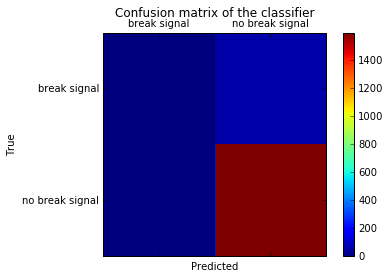

Neural Net
[[   1   60]
 [   1 1594]]


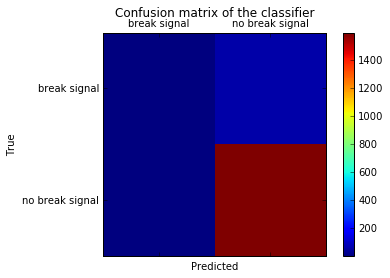

Logistic Regression
[[  27   34]
 [ 107 1488]]


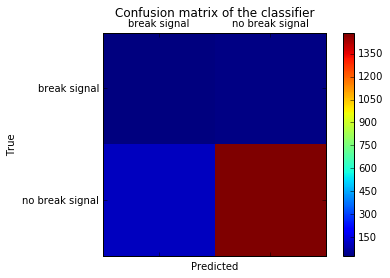

Decision Tree
[[   8   53]
 [  75 1520]]


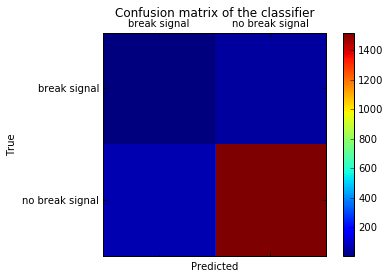

AdaBoost
[[   1   60]
 [   4 1591]]


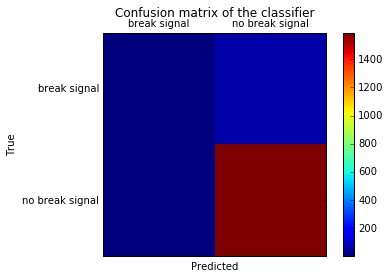

Gaussian Process
[[  61    0]
 [1595    0]]


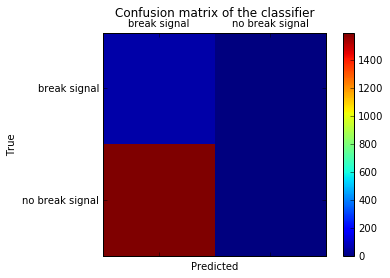

Naive Bayes
[[  49   12]
 [1137  458]]


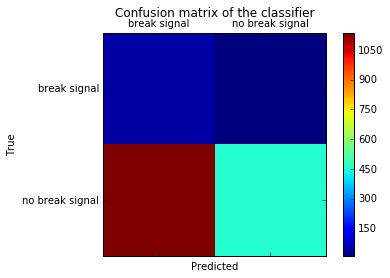

Linear SVM
[[  43   18]
 [  44 1551]]


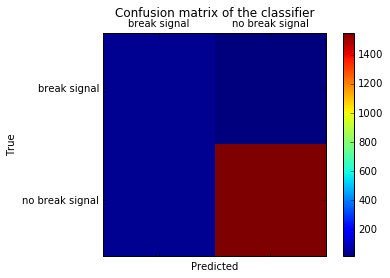

Nearest Neighbors
[[   3   58]
 [   7 1588]]


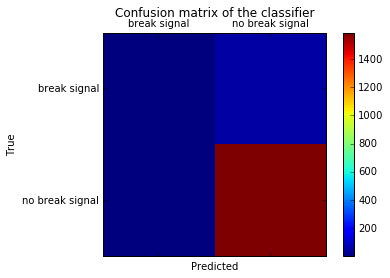

Random Forest
[[   0   61]
 [   0 1595]]


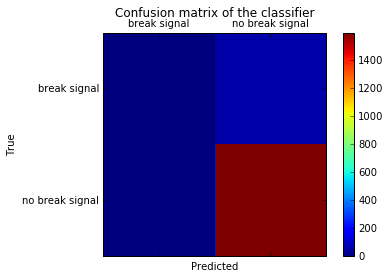

In [12]:
dictModels = batch_classify(traningFeatures, trainingLabels, testFeatures, actualResults, no_classifiers=10)

In [13]:
print traningFeatures[trainingLabels == 'normal'].shape
print traningFeatures[trainingLabels == 'brake'].shape

print testFeatures[actualResults == 'normal'].shape
print testFeatures[actualResults == 'brake'].shape

(3220, 2100)
(141, 2100)
(1595, 2100)
(61, 2100)


# After standardizing the data in the cells below then applying PCA the result is worse, The classifier classified all instances as no brake (normal events) and totally neglected breaking events

In [14]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(traningFeatures)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(traningFeatures)
test_img = scaler.transform(testFeatures)

In [15]:
pca = PCA(n_components=1000)
pca.fit(train_img)
PCA_training_features = pca.transform(train_img)
PCA_testing_features = pca.transform(test_img)

Linear SVM
[[  17   44]
 [   3 1592]]


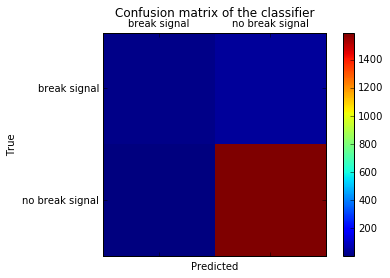

In [16]:
dictModels2 = classify(PCA_training_features, trainingLabels, PCA_testing_features, actualResults)

Under sampling unsuccessful trials. I guess we need to do this on the original data

In [17]:
# Class count
count_class_0, count_class_1 = trainingLabels.value_counts()

# Divide by class
df_class_0 = pd.concat([traningFeatures[trainingLabels == 'normal'], trainingLabels[trainingLabels == 'normal'] ], axis=1, ignore_index=True)
df_class_1 = pd.concat([traningFeatures[trainingLabels == 'brake'], trainingLabels[trainingLabels == 'brake'] ], axis=1, ignore_index=True)

In [18]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under = shuffle(df_test_under)

In [19]:
print df_test_under.shape

(282, 2101)


In [20]:
featuresColumns = df_test_under.columns[0:len(df_test_under.columns) - 1]
lablesColumn = df_test_under.columns[len(df_test_under.columns) - 1]
trainingFeaturesX = df_test_under.loc[:, featuresColumns]
trainingLabely = df_test_under.loc[:, lablesColumn]

Linear SVM
[[  51   10]
 [ 339 1256]]


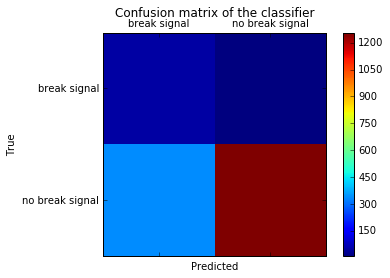

In [21]:
afterSampling = classify(trainingFeaturesX, trainingLabely, testFeatures, actualResults)

Gradient Boosting Classifier
[[  45   16]
 [ 573 1022]]


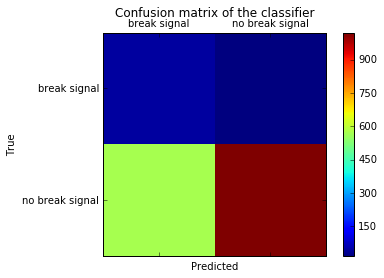

Neural Net
[[  56    5]
 [1522   73]]


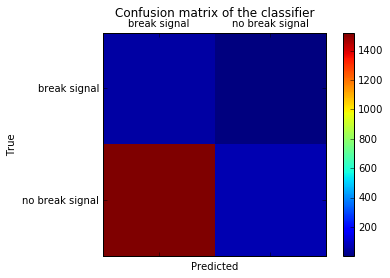

Logistic Regression
[[  50   11]
 [ 488 1107]]


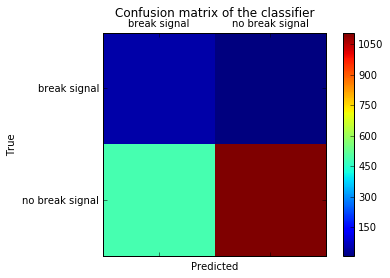

Decision Tree
[[ 36  25]
 [723 872]]


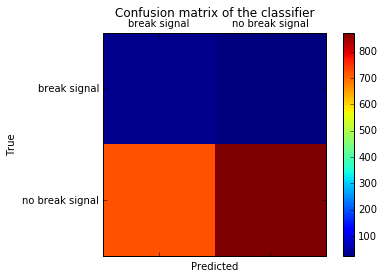

AdaBoost
[[  33   28]
 [ 581 1014]]


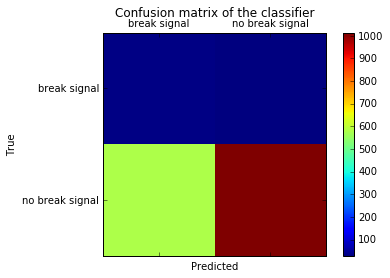

Gaussian Process
[[  61    0]
 [1595    0]]


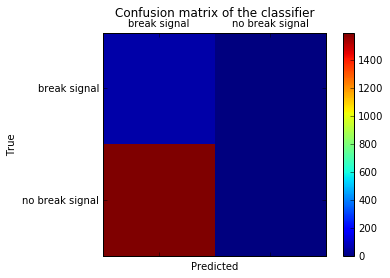

Naive Bayes
[[  25   36]
 [ 375 1220]]


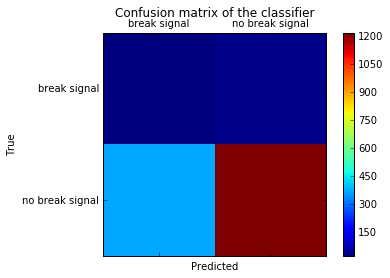

Linear SVM
[[  51   10]
 [ 339 1256]]


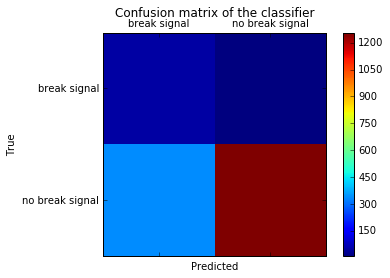

Nearest Neighbors
[[ 37  24]
 [596 999]]


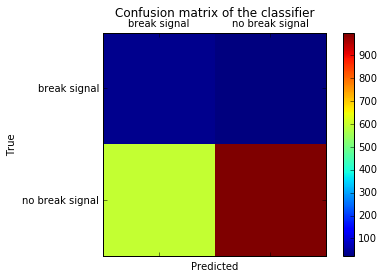

Random Forest
[[  48   13]
 [ 571 1024]]


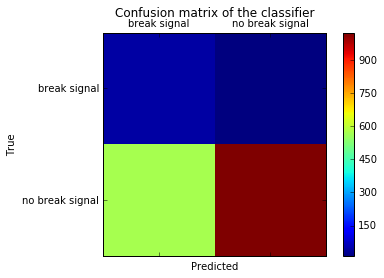

In [22]:
afterSampling = batch_classify(trainingFeaturesX, trainingLabely, testFeatures, actualResults, no_classifiers=10)

In [23]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(trainingFeaturesX)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(trainingFeaturesX)
test_img = scaler.transform(testFeatures)

In [62]:
pca = PCA(n_components=250)
pca.fit(train_img)
PCA_training_features = pca.transform(train_img)
PCA_testing_features = pca.transform(test_img)

Linear SVM
[[  51   10]
 [ 319 1276]]


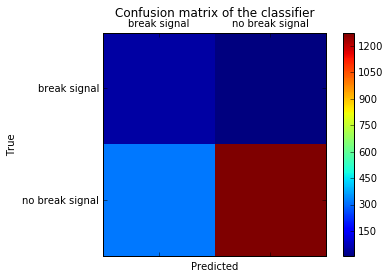

In [63]:
afterSampling_PCA = classify(PCA_training_features, trainingLabely, PCA_testing_features, actualResults)